In [26]:
pip install pandas numpy matplotlib nltk tqdm seaborn


Note: you may need to restart the kernel to use updated packages.


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tag import pos_tag
from nltk.sentiment import SentimentIntensityAnalyzer
import tqdm as notebook_tqdm
import seaborn as sns

plt.style.use('ggplot')

In [2]:
df = pd.read_csv("/Users/pulkitbatra/Desktop/CACSC17/Project/ThreadsSentimentAnalysis/37000_reviews_of_thread_app.csv",usecols=['source','review_id','user_name','review_description','rating','review_date','laguage_code','country_code','thumbs_up'])

In [3]:
df.reset_index(inplace = True)

In [4]:
df.head()

,index,source,review_id,user_name,review_description,rating,thumbs_up,review_date,laguage_code,country_code
0,0,Google Play,7cd90e5b-4829-43b9-9fb4-c8c6d1e339c1,Eddie Clark Jr.,Good,5,0.0,2023-08-07 19:14:36,en,us
1,1,Google Play,6deb8265-2bac-4524-bcb6-f90829fa4e69,Rasa RT,Weak copy of Twitter,1,0.0,2023-08-07 19:07:04,en,us
2,2,Google Play,91ef61ce-0f05-4f3b-b3d3-5d19cd408ab8,SITI NUR HAFIZA BINTI AZIZ,i wish threads have a save button for images a...,3,0.0,2023-08-07 18:57:07,en,us
3,3,Google Play,b7721b78-6b77-4f8c-a1d3-a854af4c1f0f,Asap Khalifah,Love it,5,0.0,2023-08-07 18:37:16,en,us
4,4,Google Play,c89ef522-c94c-4171-878f-1d672dce7f11,Syed Hussein,Very god,5,0.0,2023-08-07 18:14:15,en,us


In [5]:
df.shape

(36943, 10)

In [6]:
df['rating'].value_counts()

rating
5    17000
1    11282
4     3588
3     2956
2     2117
Name: count, dtype: int64

In [7]:
df['thumbs_up'].value_counts()

thumbs_up
0.0      30611
1.0       2889
2.0        520
3.0        193
4.0        124
         ...  
164.0        1
91.0         1
547.0        1
268.0        1
114.0        1
Name: count, Length: 149, dtype: int64

In [8]:
df['thumbs_up'].max()

5557.0

<Axes: title={'center': 'count for rating'}, xlabel='rating'>

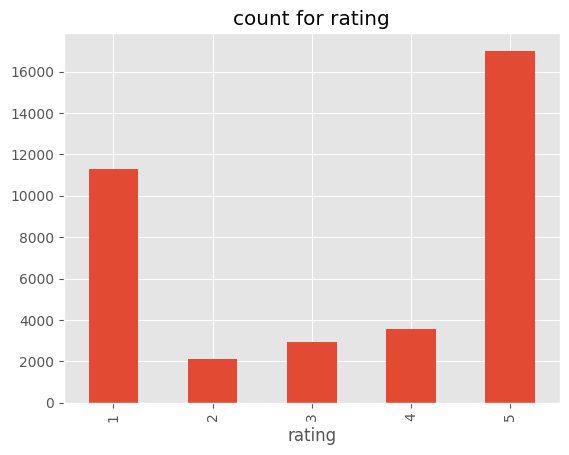

In [10]:
df['rating'].value_counts().sort_index().plot(kind='bar',title='count for rating')

## Doing some random analysis

In [22]:
temp=df['review_description'][55]
temp

'Super intuitive and easily portable from Instagram etc. I enjoy it I just always forget to use the damn thing after the influx when it debuted!'

In [37]:
# nltk.download('punkt')
# from nltk.tokenize import sent_tokenize, word_tokenize
# token = nltk.word_tokenize(temp)


In [44]:
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize

In [46]:
token = nltk.word_tokenize(temp)
token

['Super',
 'intuitive',
 'and',
 'easily',
 'portable',
 'from',
 'Instagram',
 'etc',
 '.',
 'I',
 'enjoy',
 'it',
 'I',
 'just',
 'always',
 'forget',
 'to',
 'use',
 'the',
 'damn',
 'thing',
 'after',
 'the',
 'influx',
 'when',
 'it',
 'debuted',
 '!']

In [54]:

tag = nltk.pos_tag(token)

LookupError: 
**********************************************************************
  Resource [93maveraged_perceptron_tagger[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('averaged_perceptron_tagger')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtaggers/averaged_perceptron_tagger/averaged_perceptron_tagger.pickle[0m

  Searched in:
    - '/Users/pulkitbatra/nltk_data'
    - '/opt/homebrew/opt/python@3.11/Frameworks/Python.framework/Versions/3.11/nltk_data'
    - '/opt/homebrew/opt/python@3.11/Frameworks/Python.framework/Versions/3.11/share/nltk_data'
    - '/opt/homebrew/opt/python@3.11/Frameworks/Python.framework/Versions/3.11/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************
